In [3]:
import pandas as pd
import json

fn_result_path = './false_negatives_without_context.json' 
with open(fn_result_path, 'r') as file:
    data = json.load(file)
    # Convert the loaded JSON data into a pandas DataFrame
    fn_df = pd.DataFrame(data)

print(fn_df)

           true_labels    predicted_labels                     tokens
0     [B-NAME_STUDENT]    [I-NAME_STUDENT]                 [Benjamin]
1           [B-ID_NUM]          [I-ID_NUM]             [871483046449]
2           [B-ID_NUM]          [I-ID_NUM]             [836172426340]
3     [I-NAME_STUDENT]           [I-EMAIL]                  [Mabunda]
4   [B-STREET_ADDRESS]  [I-STREET_ADDRESS]                      [591]
5        [B-PHONE_NUM]  [I-STREET_ADDRESS]             [410.526.1667]
6           [B-ID_NUM]    [I-URL_PERSONAL]                    [ras21]
7     [I-NAME_STUDENT]           [I-EMAIL]                    [Gupta]
8            [B-EMAIL]           [I-EMAIL]    [lowetyler@hotmail.com]
9     [I-NAME_STUDENT]                 [O]                 [Richards]
10    [I-NAME_STUDENT]    [B-NAME_STUDENT]                     [Luis]
11    [I-NAME_STUDENT]           [I-EMAIL]                     [Said]
12    [I-NAME_STUDENT]    [B-NAME_STUDENT]                 [Ceballos]
13    [B-NAME_STUDEN

In [4]:
# Flatten the data structure to make it suitable for a DataFrame
flattened_data = []
for entry in data:
    for token, true_label, predicted_label in zip(entry['tokens'], entry['true_labels'], entry['predicted_labels']):
            flattened_data.append({
                'Token': token,
                'True Label': true_label,
                'Predicted Label': predicted_label
            })

# Convert the list of dictionaries into a DataFrame
discrepancies_df = pd.DataFrame(flattened_data)

# Display the DataFrame
print(discrepancies_df)


                      Token        True Label   Predicted Label
0                  Benjamin    B-NAME_STUDENT    I-NAME_STUDENT
1              871483046449          B-ID_NUM          I-ID_NUM
2              836172426340          B-ID_NUM          I-ID_NUM
3                   Mabunda    I-NAME_STUDENT           I-EMAIL
4                       591  B-STREET_ADDRESS  I-STREET_ADDRESS
5              410.526.1667       B-PHONE_NUM  I-STREET_ADDRESS
6                     ras21          B-ID_NUM    I-URL_PERSONAL
7                     Gupta    I-NAME_STUDENT           I-EMAIL
8     lowetyler@hotmail.com           B-EMAIL           I-EMAIL
9                  Richards    I-NAME_STUDENT                 O
10                     Luis    I-NAME_STUDENT    B-NAME_STUDENT
11                     Said    I-NAME_STUDENT           I-EMAIL
12                 Ceballos    I-NAME_STUDENT    B-NAME_STUDENT
13                    Jamal    B-NAME_STUDENT                 O
14                    Wahab    I-NAME_ST

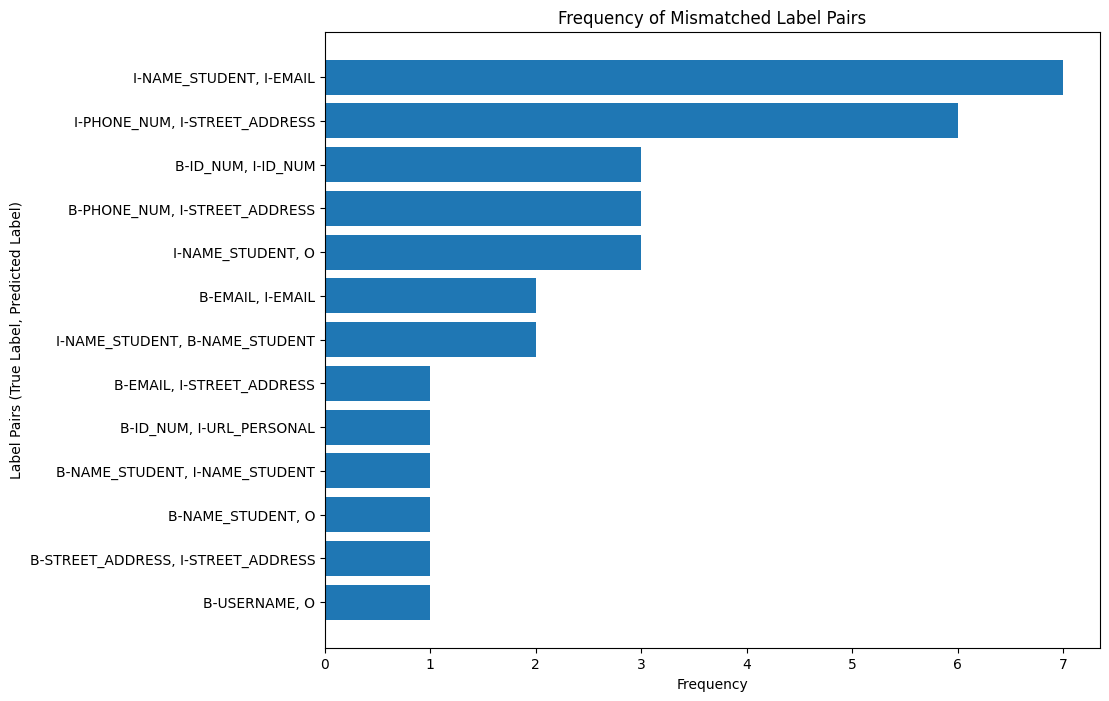

In [5]:

import matplotlib.pyplot as plt
# Group by True Label and Predicted Label to count frequencies
label_pairs = discrepancies_df.groupby(['True Label', 'Predicted Label']).size().reset_index(name='Frequency')

# Sort by frequency for better visualization
label_pairs = label_pairs.sort_values(by='Frequency', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(label_pairs['True Label'] + ", " + label_pairs['Predicted Label'], label_pairs['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Label Pairs (True Label, Predicted Label)')
plt.title('Frequency of Mismatched Label Pairs')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequencies at the top
plt.show()